In [1]:
using Pkg
Pkg.add("HMMBase")

    Updating registry at `C:\Users\Sylwia\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Sylwia\Magisterka\Project.toml`
  No Changes to `C:\Users\Sylwia\Magisterka\Manifest.toml`
Precompiling project...
  ✓ MLFlowClient
  ✓ OpenML
  ✓ YFinance
  ✓ MLJFlow
  ✓ Plots → FileIOExt
  ✓ MLJ
  ✓ Plots → UnitfulExt
  ✓ StatsPlots
  8 dependencies successfully precompiled in 73 seconds. 484 already precompiled.


In [1]:
import Pkg; Pkg.add("DataFrames")
using DataFrames

   Resolving package versions...
  No Changes to `C:\Users\Sylwia\Magisterka\Project.toml`
  No Changes to `C:\Users\Sylwia\Magisterka\Manifest.toml`


In [2]:
using Pkg 
Pkg.add("YFinance")

   Resolving package versions...
  No Changes to `C:\Users\Sylwia\Magisterka\Project.toml`
  No Changes to `C:\Users\Sylwia\Magisterka\Manifest.toml`


In [3]:
import Pkg; Pkg.add("HTTP")

   Resolving package versions...
  No Changes to `C:\Users\Sylwia\Magisterka\Project.toml`
  No Changes to `C:\Users\Sylwia\Magisterka\Manifest.toml`


In [4]:
using Pkg; Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\Sylwia\Magisterka\Project.toml`
  No Changes to `C:\Users\Sylwia\Magisterka\Manifest.toml`


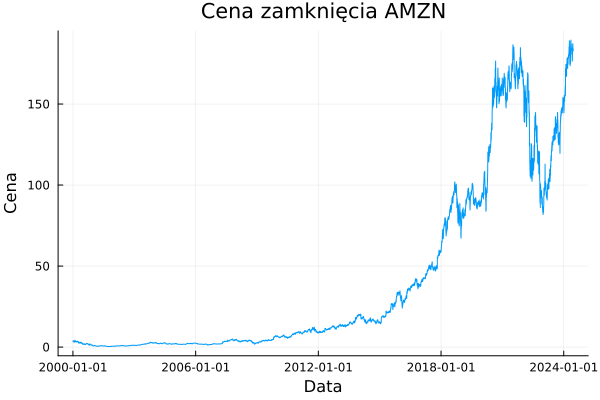

In [54]:
using HTTP, CSV, Plots

function pobierz_dane_finansowe(symbol::AbstractString, data_od::AbstractString, data_do::AbstractString)
    url = "https://query1.finance.yahoo.com/v7/finance/download/$symbol?period1=$(data_od)&period2=$(data_do)&interval=1d&events=history"
    odp = HTTP.get(url)
    CSV.File(IOBuffer(String(odp.body))) |> DataFrame

end
symbol="AMZN"
#Pobranie danych ze stony yahoo finance
data = pobierz_dane_finansowe(symbol, "946684800", "16773120000")  # Unix timestamps for "2000-01-01" and "2024-03-01"
data[!, "Price_change"] = [missing; diff(data[!, "Close"])]
data = data[2:end, :]
data[!, "Normalised_change"] = data[:, "Price_change"]/maximum(data[:, "Price_change"])

#wykres cen w zależności od daty
plot(data[!,"Date"], data[!,"Close"], xlabel="Data", ylabel="Cena", title="Cena zamknięcia $symbol", legend=false)


In [18]:

label= select(data, 1:5)

1018×5 DataFrame
  Row │ Date        Open      High     Low       Close   
      │ Date        Float64   Float64  Float64   Float64 
──────┼──────────────────────────────────────────────────
    1 │ 2021-09-02  0.435695  2.37511  0.361428  2.2287
    2 │ 2021-09-03  2.22792   7.62792  2.22646   4.69443
    3 │ 2021-09-04  4.68437   6.37792  3.72437   3.81824
    4 │ 2021-09-05  3.81656   5.63065  3.81656   5.04431
    5 │ 2021-09-06  5.01161   5.0541   3.5679    3.97777
    6 │ 2021-09-07  3.98514   4.23487  2.22849   2.73924
    7 │ 2021-09-08  2.74065   3.47912  2.4173    2.7299
    8 │ 2021-09-09  2.54437   2.99162  2.25171   2.35195
    9 │ 2021-09-10  2.35218   2.64124  2.05819   2.12431
   10 │ 2021-09-11  2.12162   2.68506  2.12162   2.37139
   11 │ 2021-09-12  2.37606   2.60864  2.33518   2.45367
  ⋮   │     ⋮          ⋮         ⋮        ⋮         ⋮
 1009 │ 2024-06-06  1.73491   1.74633  1.6179    1.62495
 1010 │ 2024-06-07  1.62495   1.74385  1.47435   1.60192
 1011 │ 2024-06-08  1.60159   1.62179  1.47977   1.50604
 1012 │ 2024-06-09  1.50582   1.69816  1.49705   1.68668
 1013 │ 2024-06-10  1.6867    1.69139  1.51304   1.51355
 1014 │ 2024-06-11  1.51358   1.5743   1.42299   1.45973
 1015 │ 2024-06-12  1.45963   1.65256  1.44606   1.5452
 1016 │ 2024-06-13  1.54499   1.54499  1.4139    1.5002
 1017 │ 2024-06-14  1.49554   1.49554  1.31594   1.32946
 1018 │ 2024-06-15  1.32759   1.35058  1.30667   1.31384
                                         997 rows omitted

In [19]:
diff(data[!, "Close"])

1017-element Vector{Float64}:
  2.46573
 -0.8761900000000002
  1.2260669999999996
 -1.066531
 -1.2385379999999997
 -0.009341000000000044
 -0.3779490000000001
 -0.2276349999999998
  0.2470749999999997
  0.08228200000000019
 -0.3366570000000002
  0.26097400000000004
  0.6218889999999999
  ⋮
 -0.05582900000000013
  0.15826400000000018
 -0.10995700000000008
 -0.023034999999999917
 -0.09587500000000015
  0.18063800000000008
 -0.17313400000000012
 -0.05381799999999992
  0.08546600000000004
 -0.04499399999999998
 -0.17074100000000003
 -0.015621000000000107

In [20]:
data[!, "Price_change"] = [missing; diff(data[!, "Close"])]

1018-element Vector{Union{Missing, Float64}}:
   missing
  2.46573
 -0.8761900000000002
  1.2260669999999996
 -1.066531
 -1.2385379999999997
 -0.009341000000000044
 -0.3779490000000001
 -0.2276349999999998
  0.2470749999999997
  0.08228200000000019
 -0.3366570000000002
  0.26097400000000004
  ⋮
 -0.05582900000000013
  0.15826400000000018
 -0.10995700000000008
 -0.023034999999999917
 -0.09587500000000015
  0.18063800000000008
 -0.17313400000000012
 -0.05381799999999992
  0.08546600000000004
 -0.04499399999999998
 -0.17074100000000003
 -0.015621000000000107

In [21]:
data

1018×8 DataFrame
  Row │ Date        Open      High     Low       Close    Adj Close  Volume    ⋯
      │ Date        Float64   Float64  Float64   Float64  Float64    Int64     ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2021-09-02  0.435695  2.37511  0.361428  2.2287     2.2287    77632832 ⋯
    2 │ 2021-09-03  2.22792   7.62792  2.22646   4.69443    4.69443  404316114
    3 │ 2021-09-04  4.68437   6.37792  3.72437   3.81824    3.81824  349682771
    4 │ 2021-09-05  3.81656   5.63065  3.81656   5.04431    5.04431  212659098
    5 │ 2021-09-06  5.01161   5.0541   3.5679    3.97777    3.97777  320104268 ⋯
    6 │ 2021-09-07  3.98514   4.23487  2.22849   2.73924    2.73924  210618500
    7 │ 2021-09-08  2.74065   3.47912  2.4173    2.7299     2.7299   242528339
    8 │ 2021-09-09  2.54437   2.99162  2.25171   2.35195    2.35195  129706772
    9 │ 2021-09-10  2.35218   2.64124  2.05819   2.12431    2.12431   86772061 ⋯
   10 │ 2021-09-11  2.12162   2.68506  2.12162   2.37139    2.37139   71737559
   11 │ 2021-09-12  2.37606   2.60864  2.33518   2.45367    2.45367   48756322
  ⋮   │     ⋮          ⋮         ⋮        ⋮         ⋮         ⋮          ⋮     ⋱
 1009 │ 2024-06-06  1.73491   1.74633  1.6179    1.62495    1.62495   13092120
 1010 │ 2024-06-07  1.62495   1.74385  1.47435   1.60192    1.60192   31756166 ⋯
 1011 │ 2024-06-08  1.60159   1.62179  1.47977   1.50604    1.50604   15720937
 1012 │ 2024-06-09  1.50582   1.69816  1.49705   1.68668    1.68668   25850128
 1013 │ 2024-06-10  1.6867    1.69139  1.51304   1.51355    1.51355   16153904
 1014 │ 2024-06-11  1.51358   1.5743   1.42299   1.45973    1.45973   20028753 ⋯
 1015 │ 2024-06-12  1.45963   1.65256  1.44606   1.5452     1.5452    17794756
 1016 │ 2024-06-13  1.54499   1.54499  1.4139    1.5002     1.5002    14903502
 1017 │ 2024-06-14  1.49554   1.49554  1.31594   1.32946    1.32946   18279309
 1018 │ 2024-06-15  1.32759   1.35058  1.30667   1.31384    1.31384   14189563 ⋯
                                                   1 column and 997 rows omitted

In [22]:
data = data[2:end, :]

1017×8 DataFrame
  Row │ Date        Open     High     Low      Close    Adj Close  Volume      ⋯
      │ Date        Float64  Float64  Float64  Float64  Float64    Int64       ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2021-09-03  2.22792  7.62792  2.22646  4.69443    4.69443  404316114   ⋯
    2 │ 2021-09-04  4.68437  6.37792  3.72437  3.81824    3.81824  349682771
    3 │ 2021-09-05  3.81656  5.63065  3.81656  5.04431    5.04431  212659098
    4 │ 2021-09-06  5.01161  5.0541   3.5679   3.97777    3.97777  320104268
    5 │ 2021-09-07  3.98514  4.23487  2.22849  2.73924    2.73924  210618500   ⋯
    6 │ 2021-09-08  2.74065  3.47912  2.4173   2.7299     2.7299   242528339
    7 │ 2021-09-09  2.54437  2.99162  2.25171  2.35195    2.35195  129706772
    8 │ 2021-09-10  2.35218  2.64124  2.05819  2.12431    2.12431   86772061
    9 │ 2021-09-11  2.12162  2.68506  2.12162  2.37139    2.37139   71737559   ⋯
   10 │ 2021-09-12  2.37606  2.60864  2.33518  2.45367    2.45367   48756322
   11 │ 2021-09-13  2.44782  2.47179  2.04394  2.11701    2.11701   41915080
  ⋮   │     ⋮          ⋮        ⋮        ⋮        ⋮         ⋮          ⋮       ⋱
 1008 │ 2024-06-06  1.73491  1.74633  1.6179   1.62495    1.62495   13092120
 1009 │ 2024-06-07  1.62495  1.74385  1.47435  1.60192    1.60192   31756166   ⋯
 1010 │ 2024-06-08  1.60159  1.62179  1.47977  1.50604    1.50604   15720937
 1011 │ 2024-06-09  1.50582  1.69816  1.49705  1.68668    1.68668   25850128
 1012 │ 2024-06-10  1.6867   1.69139  1.51304  1.51355    1.51355   16153904
 1013 │ 2024-06-11  1.51358  1.5743   1.42299  1.45973    1.45973   20028753   ⋯
 1014 │ 2024-06-12  1.45963  1.65256  1.44606  1.5452     1.5452    17794756
 1015 │ 2024-06-13  1.54499  1.54499  1.4139   1.5002     1.5002    14903502
 1016 │ 2024-06-14  1.49554  1.49554  1.31594  1.32946    1.32946   18279309
 1017 │ 2024-06-15  1.32759  1.35058  1.30667  1.31384    1.31384   14189563   ⋯
                                                   1 column and 996 rows omitted

In [23]:
maximum(data[:, "Price_change"])

2.46573

In [24]:
data[:, "Price_change"]/maximum(data[:, "Price_change"])

1017-element Vector{Float64}:
  1.0
 -0.3553470980196535
  0.49724300714190095
 -0.43254168136819515
 -0.5023007385236825
 -0.003788330433583581
 -0.15328077283400862
 -0.09231951592429008
  0.10020359082300158
  0.03337023923949507
 -0.13653441374359732
  0.10584046103993544
  0.2522129349117705
  ⋮
 -0.022641976209885156
  0.06418545420625947
 -0.04459409586613298
 -0.00934206097180142
 -0.03888300827746759
  0.07325944040912835
 -0.07021612260872039
 -0.021826396239653132
  0.034661540395744886
 -0.01824774002019685
 -0.06924561894449109
 -0.006335243518146799

In [25]:
data[!, "Normalised_change"] = data[:, "Price_change"]/maximum(data[:, "Price_change"])

1017-element Vector{Float64}:
  1.0
 -0.3553470980196535
  0.49724300714190095
 -0.43254168136819515
 -0.5023007385236825
 -0.003788330433583581
 -0.15328077283400862
 -0.09231951592429008
  0.10020359082300158
  0.03337023923949507
 -0.13653441374359732
  0.10584046103993544
  0.2522129349117705
  ⋮
 -0.022641976209885156
  0.06418545420625947
 -0.04459409586613298
 -0.00934206097180142
 -0.03888300827746759
  0.07325944040912835
 -0.07021612260872039
 -0.021826396239653132
  0.034661540395744886
 -0.01824774002019685
 -0.06924561894449109
 -0.006335243518146799

In [26]:
data[!,"Date"]

1017-element Vector{Dates.Date}:
 2021-09-03
 2021-09-04
 2021-09-05
 2021-09-06
 2021-09-07
 2021-09-08
 2021-09-09
 2021-09-10
 2021-09-11
 2021-09-12
 2021-09-13
 2021-09-14
 2021-09-15
 ⋮
 2024-06-04
 2024-06-05
 2024-06-06
 2024-06-07
 2024-06-08
 2024-06-09
 2024-06-10
 2024-06-11
 2024-06-12
 2024-06-13
 2024-06-14
 2024-06-15

In [6]:
using Pkg; Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\Sylwia\Magisterka\Project.toml`
  No Changes to `C:\Users\Sylwia\Magisterka\Manifest.toml`


In [778]:
using Plots

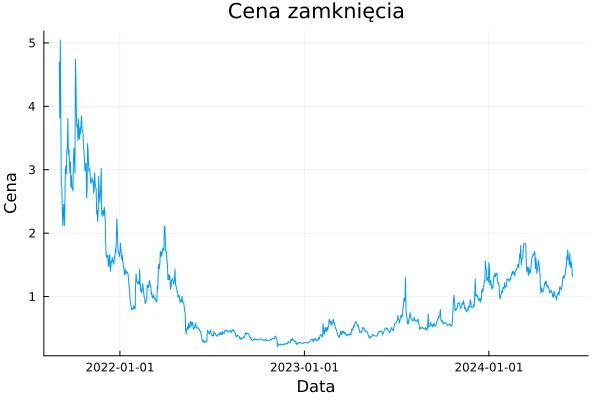

In [28]:
using Plots
#wykres cen w zależności od daty
plot(data[!,"Date"], data[!,"Close"], xlabel="Data", ylabel="Cena", title="Cena zamknięcia", legend=false)



In [ ]:
# Wykres dla danych znormalizowanych
plot(data[!,"Date"], data[!,"Normalised_change"], xlabel="Date", ylabel="Price Change", title="Normalized Change", legend=false)


In [117]:
#il_probek=200#365
#dl = size(data, 1) - il_probek
df = data#[1:dl, :]

6153×9 DataFrame
  Row │ Date        Open       High       Low        Close      Adj Close  Vol ⋯
      │ Date        Float64    Float64    Float64    Float64    Float64    Int ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2000-01-04    4.26875    4.575      4.0875     4.09687    4.09687  349 ⋯
    2 │ 2000-01-05    3.525      3.75625    3.4        3.4875     3.4875   769
    3 │ 2000-01-06    3.56562    3.63437    3.2        3.27813    3.27813  375
    4 │ 2000-01-07    3.35       3.525      3.30938    3.47812    3.47812  210
    5 │ 2000-01-10    3.62812    3.63125    3.27813    3.45938    3.45938  295 ⋯
    6 │ 2000-01-11    3.34375    3.5        3.25       3.3375     3.3375   210
    7 │ 2000-01-12    3.39375    3.4        3.15       3.17813    3.17813  216
    8 │ 2000-01-13    3.24688    3.35938    3.15625    3.29688    3.29688  208
    9 │ 2000-01-14    3.3375     3.43125    3.2        3.2125     3.2125   137 ⋯
   10 │ 2000-01-18    3.17188    3.25937    3.15       3.20625    3.20625  107
   11 │ 2000-01-19    3.20625    3.375      3.15       3.34063    3.34063  164
  ⋮   │     ⋮           ⋮          ⋮          ⋮          ⋮          ⋮          ⋱
 6144 │ 2024-06-05  180.1      181.5      178.75     181.28     181.28      32
 6145 │ 2024-06-06  181.75     185.0      181.49     185.0      185.0       31 ⋯
 6146 │ 2024-06-07  184.9      186.29     183.36     184.3      184.3       28
 6147 │ 2024-06-10  184.07     187.23     183.79     187.06     187.06      34
 6148 │ 2024-06-11  187.06     187.77     184.54     187.23     187.23      27
 6149 │ 2024-06-12  188.02     188.35     185.43     186.89     186.89      33 ⋯
 6150 │ 2024-06-13  186.09     187.67     182.67     183.83     183.83      39
 6151 │ 2024-06-14  183.08     183.72     182.23     183.66     183.66      25
 6152 │ 2024-06-17  182.52     185.0      181.22     184.06     184.06      35
 6153 │ 2024-06-18  183.662    184.29     181.43     182.795    182.795     24 ⋯
                                                 3 columns and 6132 rows omitted

In [118]:
using PyCall
using DataFrames

# Instalacja pakietów Pythona
pyimport_conda("hmmlearn.hmm", "hmmlearn")
pyimport_conda("numpy", "numpy")
pyimport_conda("pandas", "pandas")

@pyimport numpy as np
@pyimport pandas as pd

py"""
from hmmlearn import hmm
import numpy as np
import pandas as pd

class HiddenMM:
    def __init__(self, data,num_sample,num_comp,algorithm):
        self.bic = None
        self.aic = None
        self.model_score = None
        self.data = data
        self.num_sample = num_sample
        self.num_comp=num_comp
        self.algorithm=algorithm

    def GHiddenMM(self):
        # Dzienna zmiany ceny jako obserwowane pomiary X.
        X = self.data[["Normalised_change"]].values
        if self.algorithm==1:
            alg='viterbi'
        if self.algorithm==2:
            alg='map'
        # Budowa modelu HMM oraz dopasowanie do danych
        model = hmm.GaussianHMM(n_components=self.num_comp, covariance_type="spherical", n_iter=10000,algorithm=alg)
        model.fit(X)

        # Predykcja ukrytych stanów odpowiadających obserwowanemu X.
        Z = model.predict(X)
        states = pd.unique(Z)
        states = np.sort(states)

        # Obliczenie wyniku modelu, AIC oraz BIC
        self.model_score = model.score(X)
        n_parameters = model.n_components * (model.n_components - 1) + 2 * model.n_components
        self.aic = -2 * self.model_score + 2 * n_parameters
        self.bic = -2 * self.model_score + np.log(len(X)) * n_parameters

        # Wygenerowanie nowych próbek danych
        X_sample, Z_sample = model.sample(self.num_sample)
        X_sample = X_sample.flatten()

        # Stworzenie ramki danych dla nowych obserwacji
        df_new_obs = pd.DataFrame({'Observation': X_sample, 'State': Z_sample})
        df_new_obs.index = self.data.index[-self.num_sample:]
        num_sample=self.num_sample
        # Połączenie nowych obserwacji z oryginalnymi danymi
        df_merged = pd.concat([self.data, df_new_obs], axis=1)
        current_state_probabilities= model.startprob_

        return self.model_score, self.aic, self.bic, Z,X_sample, df_merged, states, model.transmat_, model.means_, model.covars_,num_sample,current_state_probabilities

"""

# wywołanie funkcji napisanej w Pythonie za pomocą Julii
function call_GHiddenMM(data::DataFrame)
    # Konwersja ramki danych w Julii do ramki danych w Pythonie
    data_dict = Dict(col => convert(Vector{Any}, data[!, col]) for col in names(data))
    py_data = pycall(pd.DataFrame, PyObject, data_dict)
    
    # Stworzenie instancji klasy Python i wywołanie metody
    py_hmm = py"HiddenMM"(py_data,num_sample=num_s,num_comp=num_c,algorithm=algorithmm)
    result = py_hmm["GHiddenMM"]()

    return result
end
#ilość próbek do predykcji
num_s=il_probek
#ilość ukrytych stanów
num_c=2
#wybór algorytmu
algorithmm=1
# wywołanie funkcji
result = call_GHiddenMM(df)
model_score, aic, bic, Z,X_sample, df_merged, states, transmat, means, covars,num_sample,current_state_probabilities=result[1],result[2],result[3],result[4],result[5],result[6],result[7],result[8],result[9],result[10],result[11],result[12]


println("Model Score: ", result[1])
println("AIC: ", result[2])
println("BIC: ", result[3])
println("Predicted States: ", result[4])
println("Predicted Sample: ", result[5])
println("DataFrame with Predicted States: ", result[6])
println("States: ", result[7])
println("Transition Matrix: ", result[8])
println("Means: ", result[9])
println("Covariances: ", result[10])




Model Score: 15054.049587728317
AIC: -30096.099175456635
BIC: -30055.751005176193
Predicted States: [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [99]:
df_merged

PyObject        Adj Close         Low       Close  ...     Volume  Observation  State
0       4.096875    4.087500    4.096875  ...  349748000          NaN    NaN
1       3.487500    3.400000    3.487500  ...  769148000          NaN    NaN
2       3.278125    3.200000    3.278125  ...  375040000          NaN    NaN
3       3.478125    3.309375    3.478125  ...  210108000          NaN    NaN
4       3.459375    3.278125    3.459375  ...  295158000          NaN    NaN
...          ...         ...         ...  ...        ...          ...    ...
6148  186.889999  185.429993  186.889999  ...   33984200     0.033798    1.0
6149  183.830002  182.669998  183.830002  ...   39721500    -0.236640    1.0
6150  183.660004  182.229996  183.660004  ...   25456400     0.204229    1.0
6151  184.059998  181.220001  184.059998  ...   35601900     0.263827    1.0
6152  182.794998  181.429993  182.794998  ...   24380476     0.192165    1.0

[6153 rows x 11 columns]

In [100]:
# Funkcja koonwertująca ramkę danych Pandasdo ramki danych w Julii
function pd_to_df(df_pd)
    df = DataFrame()
    for col in df_pd.columns
        df[!, Symbol(col)] =  getproperty(df_pd, col).values
    end
    df
end

# wywołanie funkcji
df_julia = pd_to_df(df_merged)


6153×11 DataFrame
  Row │ Adj Close  Low        Close      Price_change  Normalised_change  Open ⋯
      │ Float64    Float64    Float64    Float64       Float64            Floa ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │   4.09687    4.0875     4.09687     -0.371875       -0.0197869      4. ⋯
    2 │   3.4875     3.4        3.4875      -0.609375       -0.0324239      3.
    3 │   3.27813    3.2        3.27813     -0.209375       -0.0111405      3.
    4 │   3.47812    3.30938    3.47812      0.2             0.0106417      3.
    5 │   3.45938    3.27813    3.45938     -0.01875        -0.000997659    3. ⋯
    6 │   3.3375     3.25       3.3375      -0.121875       -0.00648479     3.
    7 │   3.17813    3.15       3.17813     -0.159375       -0.0084801      3.
    8 │   3.29688    3.15625    3.29688      0.11875         0.00631851     3.
    9 │   3.2125     3.2        3.2125      -0.084375       -0.00448947     3. ⋯
   10 │   3.20625    3.15       3.20625     -0.00625        -0.000332553    3.
   11 │   3.34063    3.15       3.34063      0.134375        0.00714989     3.
  ⋮   │     ⋮          ⋮          ⋮           ⋮                ⋮               ⋱
 6144 │ 181.28     178.75     181.28         1.94            0.103225     180.
 6145 │ 185.0      181.49     185.0          3.72            0.197936     181. ⋯
 6146 │ 184.3      183.36     184.3         -0.699997       -0.0372458    184.
 6147 │ 187.06     183.79     187.06         2.76            0.146855     184.
 6148 │ 187.23     184.54     187.23         0.169998        0.00904534   187.
 6149 │ 186.89     185.43     186.89        -0.339997       -0.0180907    188. ⋯
 6150 │ 183.83     182.67     183.83        -3.06           -0.162818     186.
 6151 │ 183.66     182.23     183.66        -0.169998       -0.00904534   183.
 6152 │ 184.06     181.22     184.06         0.399994        0.0212831    182.
 6153 │ 182.795    181.43     182.795       -1.265          -0.0673087    183. ⋯
                                                 6 columns and 6132 rows omitted

In [101]:
using PyCall
using DataFrames
using Dates
pandas = pyimport("pandas")
#Konwersja ramki danych typu PyObject na Julia DataFrame
function pd_to_df(df_pd)
    df = DataFrame()
    for col in df_pd.columns
        df[!, Symbol(col)] = getproperty(df_pd, col).values
    end
    df
end

# konwersja ramki danych
df_merged = pd_to_df(df_merged)
# ramka danych df_merged z kolumną "Date" do konwersji 
df_python = DataFrame(Date = map(string, df_merged[:,"Date"]))

# Funkcja znajdująca indeksy '(' oraz ')' w tekście
function find_indices_of_parentheses(s::AbstractString)
    index_open = findfirst('(', s)
    index_close = findfirst(')', s)
    return (index_open === nothing ? 0 : index_open, index_close === nothing ? 0 : index_close)
end

# Konwersja Python objects do Julia strings
dates_julia = map(eachrow(df_python)) do row
    string(row.Date)
end

# Wywołanie funkcji dla każdego wiersza
indices_of_parentheses = [find_indices_of_parentheses(date) for date in dates_julia]
# Ekstrakcja indeksów '(' oraz ')' do osobnych kolumn w DataFrame
df_python[!, :Index_of_Open_Parenthesis] = [index[1] for index in indices_of_parentheses]
df_python[!, :Index_of_Close_Parenthesis] = [index[2] for index in indices_of_parentheses]

# Funkcja zwracająca fragment tekstu między '(' oraz ')'
function extract_substring(s::AbstractString, start::Int, stop::Int)
    return s[start+1:stop-1]  # +1 i -1, aby wykluczyć same nawiasy
end

# Zastosowanie funkcji do DataFrame wiersz po wierszu
df_python[!, :Extracted_Substring] = [extract_substring(row.Date, row.Index_of_Open_Parenthesis, row.Index_of_Close_Parenthesis)
                                      for row in eachrow(df_python)]

# Pobranie ciągów znaków po ekstrakcji
date_strings = df_python[:,"Extracted_Substring"]
# Inicjalizacja pustego wektora do przechowywania obiektów Date
dates = Date[]

# Iteracja po każdym ciągu znaków, parsowanie i zapis jako obiekt Date
for date_str in date_strings
    # Podział ciągu znaków po przecinkach i konwersja części na liczby całkowite
    parts = split(date_str, ",")
    year = parse(Int, strip(parts[1]))
    month = parse(Int, strip(parts[2]))
    day = parse(Int, strip(parts[3]))
    
    # Utworzenie obiektu Date i dodanie go do wektora dates
    push!(dates, Date(year, month, day))
end
# Przypisanie skonwertowanych dat do oryginalnego DataFrame `df_merged`
df_merged.Date = dates

6153-element Vector{Date}:
 2000-01-04
 2000-01-05
 2000-01-06
 2000-01-07
 2000-01-10
 2000-01-11
 2000-01-12
 2000-01-13
 2000-01-14
 2000-01-18
 2000-01-19
 2000-01-20
 2000-01-21
 ⋮
 2024-06-03
 2024-06-04
 2024-06-05
 2024-06-06
 2024-06-07
 2024-06-10
 2024-06-11
 2024-06-12
 2024-06-13
 2024-06-14
 2024-06-17
 2024-06-18

In [102]:
df_merged

6153×11 DataFrame
  Row │ Adj Close  Low        Close      Price_change  Normalised_change  Open ⋯
      │ Float64    Float64    Float64    Float64       Float64            Floa ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │   4.09687    4.0875     4.09687     -0.371875       -0.0197869      4. ⋯
    2 │   3.4875     3.4        3.4875      -0.609375       -0.0324239      3.
    3 │   3.27813    3.2        3.27813     -0.209375       -0.0111405      3.
    4 │   3.47812    3.30938    3.47812      0.2             0.0106417      3.
    5 │   3.45938    3.27813    3.45938     -0.01875        -0.000997659    3. ⋯
    6 │   3.3375     3.25       3.3375      -0.121875       -0.00648479     3.
    7 │   3.17813    3.15       3.17813     -0.159375       -0.0084801      3.
    8 │   3.29688    3.15625    3.29688      0.11875         0.00631851     3.
    9 │   3.2125     3.2        3.2125      -0.084375       -0.00448947     3. ⋯
   10 │   3.20625    3.15       3.20625     -0.00625        -0.000332553    3.
   11 │   3.34063    3.15       3.34063      0.134375        0.00714989     3.
  ⋮   │     ⋮          ⋮          ⋮           ⋮                ⋮               ⋱
 6144 │ 181.28     178.75     181.28         1.94            0.103225     180.
 6145 │ 185.0      181.49     185.0          3.72            0.197936     181. ⋯
 6146 │ 184.3      183.36     184.3         -0.699997       -0.0372458    184.
 6147 │ 187.06     183.79     187.06         2.76            0.146855     184.
 6148 │ 187.23     184.54     187.23         0.169998        0.00904534   187.
 6149 │ 186.89     185.43     186.89        -0.339997       -0.0180907    188. ⋯
 6150 │ 183.83     182.67     183.83        -3.06           -0.162818     186.
 6151 │ 183.66     182.23     183.66        -0.169998       -0.00904534   183.
 6152 │ 184.06     181.22     184.06         0.399994        0.0212831    182.
 6153 │ 182.795    181.43     182.795       -1.265          -0.0673087    183. ⋯
                                                 6 columns and 6132 rows omitted

In [31]:
vcat(df1, df2)

5953×13 DataFrame
  Row │ Adj Close  Low        Close      Price_change  Normalised_change  Open ⋯
      │ Float64    Float64    Float64    Float64       Float64            Floa ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │   4.09687    4.0875     4.09687     -0.371875       -0.0197869      4. ⋯
    2 │   3.4875     3.4        3.4875      -0.609375       -0.0324239      3.
    3 │   3.27813    3.2        3.27813     -0.209375       -0.0111405      3.
    4 │   3.47812    3.30938    3.47812      0.2             0.0106417      3.
    5 │   3.45938    3.27813    3.45938     -0.01875        -0.000997659    3. ⋯
    6 │   3.3375     3.25       3.3375      -0.121875       -0.00648479     3.
    7 │   3.17813    3.15       3.17813     -0.159375       -0.0084801      3.
    8 │   3.29688    3.15625    3.29688      0.11875         0.00631851     3.
    9 │   3.2125     3.2        3.2125      -0.084375       -0.00448947     3. ⋯
   10 │   3.20625    3.15       3.20625     -0.00625        -0.000332553    3.
   11 │   3.34063    3.15       3.34063      0.134375        0.00714989     3.
  ⋮   │     ⋮          ⋮          ⋮           ⋮                ⋮               ⋱
 5944 │ 133.22     131.15     133.22        -0.759995       -0.0404382    131.
 5945 │ 134.68     132.71     134.68         1.45999         0.077684     133. ⋯
 5946 │ 134.25     133.73     134.25        -0.429993       -0.0228793    135.
 5947 │ 135.52     133.22     135.52         1.27            0.067575     134.
 5948 │ 131.84     131.83     131.84        -3.68001        -0.195808     136.
 5949 │ 133.26     130.58     133.26         1.42            0.075556     132. ⋯
 5950 │ 133.14     131.85     133.14        -0.119996       -0.00638481   133.
 5951 │ 134.91     133.25     134.91         1.77            0.0941793    133.
 5952 │ 135.07     133.92     135.07         0.160003        0.00851352   134.
 5953 │ 138.01     135.0      138.01         2.93999         0.156432     135. ⋯
                                                 8 columns and 5932 rows omitted

In [53]:
df_merged[:, [:Date, :Open, :High,:Low	,:Close,:Volume,	:Price_change	,:Normalised_change,:Observation,	:State]]

5953×10 DataFrame
  Row │ Date        Open       High       Low        Close      Volume     Pri ⋯
      │ Date        Float64    Float64    Float64    Float64    Int64      Flo ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2000-01-04    4.26875    4.575      4.0875     4.09687  349748000      ⋯
    2 │ 2000-01-05    3.525      3.75625    3.4        3.4875   769148000
    3 │ 2000-01-06    3.56562    3.63437    3.2        3.27813  375040000
    4 │ 2000-01-07    3.35       3.525      3.30938    3.47812  210108000
    5 │ 2000-01-10    3.62812    3.63125    3.27813    3.45938  295158000      ⋯
    6 │ 2000-01-11    3.34375    3.5        3.25       3.3375   210654000
    7 │ 2000-01-12    3.39375    3.4        3.15       3.17813  216090000
    8 │ 2000-01-13    3.24688    3.35938    3.15625    3.29688  208962000
    9 │ 2000-01-14    3.3375     3.43125    3.2        3.2125   137072000      ⋯
   10 │ 2000-01-18    3.17188    3.25937    3.15       3.20625  107698000
   11 │ 2000-01-19    3.20625    3.375      3.15       3.34063  164910000
  ⋮   │     ⋮           ⋮          ⋮          ⋮          ⋮          ⋮          ⋱
 5944 │ 2023-08-18  131.62     134.07     131.15     133.22      48469400
 5945 │ 2023-08-21  133.74     135.19     132.71     134.68      41442500      ⋯
 5946 │ 2023-08-22  135.08     135.65     133.73     134.25      32935100
 5947 │ 2023-08-23  134.5      135.95     133.22     135.52      42801000
 5948 │ 2023-08-24  136.4      136.78     131.83     131.84      43646300
 5949 │ 2023-08-25  132.47     133.87     130.58     133.26      44147500      ⋯
 5950 │ 2023-08-28  133.78     133.95     131.85     133.14      34108400
 5951 │ 2023-08-29  133.38     135.14     133.25     134.91      38646100
 5952 │ 2023-08-30  134.93     135.68     133.92     135.07      36137000
 5953 │ 2023-08-31  135.06     138.79     135.0      138.01      58781300      ⋯
                                                 4 columns and 5932 rows omitted

In [38]:

data

6153×9 DataFrame
  Row │ Date        Open       High       Low        Close      Adj Close  Vol ⋯
      │ Date        Float64    Float64    Float64    Float64    Float64    Int ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ 2000-01-04    4.26875    4.575      4.0875     4.09687    4.09687  349 ⋯
    2 │ 2000-01-05    3.525      3.75625    3.4        3.4875     3.4875   769
    3 │ 2000-01-06    3.56562    3.63437    3.2        3.27813    3.27813  375
    4 │ 2000-01-07    3.35       3.525      3.30938    3.47812    3.47812  210
    5 │ 2000-01-10    3.62812    3.63125    3.27813    3.45938    3.45938  295 ⋯
    6 │ 2000-01-11    3.34375    3.5        3.25       3.3375     3.3375   210
    7 │ 2000-01-12    3.39375    3.4        3.15       3.17813    3.17813  216
    8 │ 2000-01-13    3.24688    3.35938    3.15625    3.29688    3.29688  208
    9 │ 2000-01-14    3.3375     3.43125    3.2        3.2125     3.2125   137 ⋯
   10 │ 2000-01-18    3.17188    3.25937    3.15       3.20625    3.20625  107
   11 │ 2000-01-19    3.20625    3.375      3.15       3.34063    3.34063  164
  ⋮   │     ⋮           ⋮          ⋮          ⋮          ⋮          ⋮          ⋱
 6144 │ 2024-06-05  180.1      181.5      178.75     181.28     181.28      32
 6145 │ 2024-06-06  181.75     185.0      181.49     185.0      185.0       31 ⋯
 6146 │ 2024-06-07  184.9      186.29     183.36     184.3      184.3       28
 6147 │ 2024-06-10  184.07     187.23     183.79     187.06     187.06      34
 6148 │ 2024-06-11  187.06     187.77     184.54     187.23     187.23      27
 6149 │ 2024-06-12  188.02     188.35     185.43     186.89     186.89      33 ⋯
 6150 │ 2024-06-13  186.09     187.67     182.67     183.83     183.83      39
 6151 │ 2024-06-14  183.08     183.72     182.23     183.66     183.66      25
 6152 │ 2024-06-17  182.52     185.0      181.22     184.06     184.06      35
 6153 │ 2024-06-18  183.662    184.29     181.43     182.7      182.7       24 ⋯
                                                 3 columns and 6132 rows omitted

In [29]:
max_col = mapcols(maximum, df_merged).Price_change
df_all=data
dl=nrow(df_all)+num_sample
dff=df_all[1:dl,:]

LoadError: BoundsError: attempt to access 6153×9 DataFrame at index [1:6353, :]

In [103]:

using DataFrames
max_col = mapcols(maximum, df_merged).Price_change
df_all=df
dl=nrow(df_all)-num_sample
dff=df_all[1:dl,:]

df_merged[!,:Predicted_change] = df_merged.Observation .*max_col 
df_merged[!,:Predicted_Close]  = fill!(Vector{Union{Missing, Float64}}(missing, nrow(df_merged)), NaN)
for i in 1:num_sample
    j = nrow(dff) + i  
    if i == 1
        #dla pierwszego wiersza
        df_merged[j, :Predicted_Close] = df_merged[j-1, :Close] + df_merged[j, :Predicted_change]
    else
        df_merged[j, :Predicted_Close] = df_merged[j-1, :Predicted_Close] + df_merged[j, :Predicted_change]
    end
    i=i+1
end
df_merged


6153×13 DataFrame
  Row │ Adj Close  Low        Close      Price_change  Normalised_change  Open ⋯
      │ Float64    Float64    Float64    Float64       Float64            Floa ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │   4.09687    4.0875     4.09687     -0.371875       -0.0197869      4. ⋯
    2 │   3.4875     3.4        3.4875      -0.609375       -0.0324239      3.
    3 │   3.27813    3.2        3.27813     -0.209375       -0.0111405      3.
    4 │   3.47812    3.30938    3.47812      0.2             0.0106417      3.
    5 │   3.45938    3.27813    3.45938     -0.01875        -0.000997659    3. ⋯
    6 │   3.3375     3.25       3.3375      -0.121875       -0.00648479     3.
    7 │   3.17813    3.15       3.17813     -0.159375       -0.0084801      3.
    8 │   3.29688    3.15625    3.29688      0.11875         0.00631851     3.
    9 │   3.2125     3.2        3.2125      -0.084375       -0.00448947     3. ⋯
   10 │   3.20625    3.15       3.20625     -0.00625        -0.000332553    3.
   11 │   3.34063    3.15       3.34063      0.134375        0.00714989     3.
  ⋮   │     ⋮          ⋮          ⋮           ⋮                ⋮               ⋱
 6144 │ 181.28     178.75     181.28         1.94            0.103225     180.
 6145 │ 185.0      181.49     185.0          3.72            0.197936     181. ⋯
 6146 │ 184.3      183.36     184.3         -0.699997       -0.0372458    184.
 6147 │ 187.06     183.79     187.06         2.76            0.146855     184.
 6148 │ 187.23     184.54     187.23         0.169998        0.00904534   187.
 6149 │ 186.89     185.43     186.89        -0.339997       -0.0180907    188. ⋯
 6150 │ 183.83     182.67     183.83        -3.06           -0.162818     186.
 6151 │ 183.66     182.23     183.66        -0.169998       -0.00904534   183.
 6152 │ 184.06     181.22     184.06         0.399994        0.0212831    182.
 6153 │ 182.795    181.43     182.795       -1.265          -0.0673087    183. ⋯
                                                 8 columns and 6132 rows omitted

In [20]:
last(df_merged,5)

5×13 DataFrame
 Row │ Adj Close  Low      Close    Price_change  Normalised_change  Open      ⋯
     │ Float64    Float64  Float64  Float64       Float64            Float64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    133.26   130.58   133.26      1.42             0.075556     132.47   ⋯
   2 │    133.14   131.85   133.14     -0.119996        -0.00638481   133.78
   3 │    134.91   133.25   134.91      1.77             0.0941793    133.38
   4 │    135.07   133.92   135.07      0.160003         0.00851352   134.93
   5 │    138.01   135.0    138.01      2.93999          0.156432     135.06   ⋯
                                                               7 columns omitted

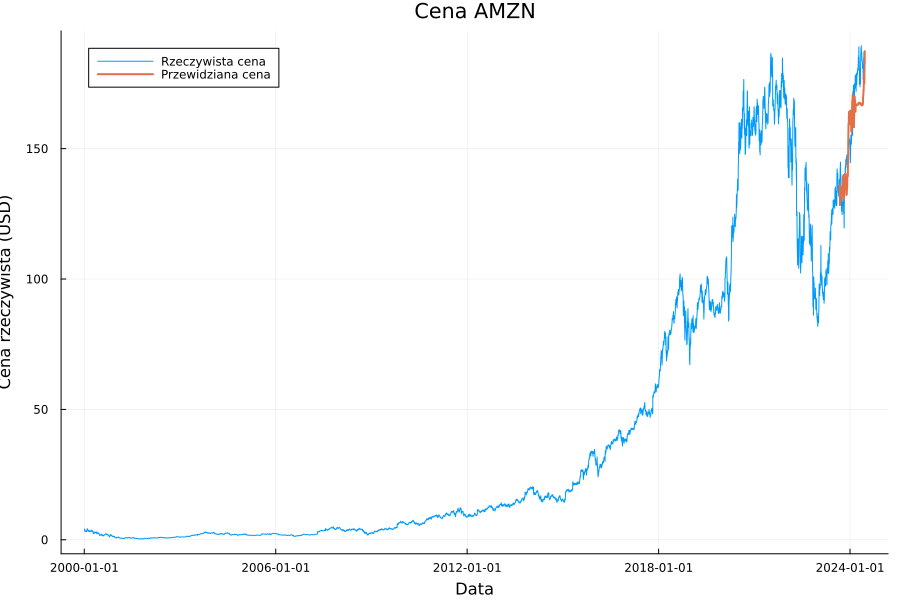

In [104]:
using Plots

plot(
    df_all[:, "Date"], df_all[:, "Close"],
    label = "Rzeczywista cena",
    xlabel = "Data",
    ylabel = "Cena rzeczywista (USD)",
    grid = true,
    title = "Cena $symbol",
    size = (900, 600),
    legend = :topleft
)
plot!(
    df_merged[:, "Date"], df_merged[:, "Predicted_Close"],
    label = "Przewidziana cena",
    #linestyle = :dash,
    linewidth = 2
)


In [105]:
model_score, aic, bic, Z,X_sample, df_merged, states, transmat, means, covars

(15054.049770130065, -30096.09954026013, -30055.751369979687, [1, 1, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-0.10688369737091556, -0.04388399906893983, -0.14200458725711582, 0.053954378039530036, -0.2750712524753393, 0.014949652385305188, 0.05250340173703692, 0.13965077935990391, -0.062272922975517786, -0.05414054886248923  …  -0.018914549658482285, 0.051657657098777864, 0.25129295952527564, 0.04344607239161053, -0.01031545368528681, 0.03379768361685004, -0.2366400228682165, 0.20422913179200616, 0.2638267160848846, 0.19216514600727264], 6153×13 DataFrame
  Row │ Adj Close  Low        Close      Price_change  Normalised_change  Open ⋯
      │ Float64    Float64    Float64    Float64       Float64            Floa ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │   4.09687    4.0875     4.09687     -0.371875       -0.0197869      4. ⋯
    2 │   3.4875     3.4        3.4875      -0.609375       -0.0324239      3.
    3 │   3.2781

In [106]:
df_merged

6153×13 DataFrame
  Row │ Adj Close  Low        Close      Price_change  Normalised_change  Open ⋯
      │ Float64    Float64    Float64    Float64       Float64            Floa ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │   4.09687    4.0875     4.09687     -0.371875       -0.0197869      4. ⋯
    2 │   3.4875     3.4        3.4875      -0.609375       -0.0324239      3.
    3 │   3.27813    3.2        3.27813     -0.209375       -0.0111405      3.
    4 │   3.47812    3.30938    3.47812      0.2             0.0106417      3.
    5 │   3.45938    3.27813    3.45938     -0.01875        -0.000997659    3. ⋯
    6 │   3.3375     3.25       3.3375      -0.121875       -0.00648479     3.
    7 │   3.17813    3.15       3.17813     -0.159375       -0.0084801      3.
    8 │   3.29688    3.15625    3.29688      0.11875         0.00631851     3.
    9 │   3.2125     3.2        3.2125      -0.084375       -0.00448947     3. ⋯
   10 │   3.20625    3.15       3.20625     -0.00625        -0.000332553    3.
   11 │   3.34063    3.15       3.34063      0.134375        0.00714989     3.
  ⋮   │     ⋮          ⋮          ⋮           ⋮                ⋮               ⋱
 6144 │ 181.28     178.75     181.28         1.94            0.103225     180.
 6145 │ 185.0      181.49     185.0          3.72            0.197936     181. ⋯
 6146 │ 184.3      183.36     184.3         -0.699997       -0.0372458    184.
 6147 │ 187.06     183.79     187.06         2.76            0.146855     184.
 6148 │ 187.23     184.54     187.23         0.169998        0.00904534   187.
 6149 │ 186.89     185.43     186.89        -0.339997       -0.0180907    188. ⋯
 6150 │ 183.83     182.67     183.83        -3.06           -0.162818     186.
 6151 │ 183.66     182.23     183.66        -0.169998       -0.00904534   183.
 6152 │ 184.06     181.22     184.06         0.399994        0.0212831    182.
 6153 │ 182.795    181.43     182.795       -1.265          -0.0673087    183. ⋯
                                                 8 columns and 6132 rows omitted

In [15]:
import Pkg; Pkg.add("Colors")

   Resolving package versions...
  No Changes to `C:\Users\Sylwia\Magisterka\Project.toml`
  No Changes to `C:\Users\Sylwia\Magisterka\Manifest.toml`


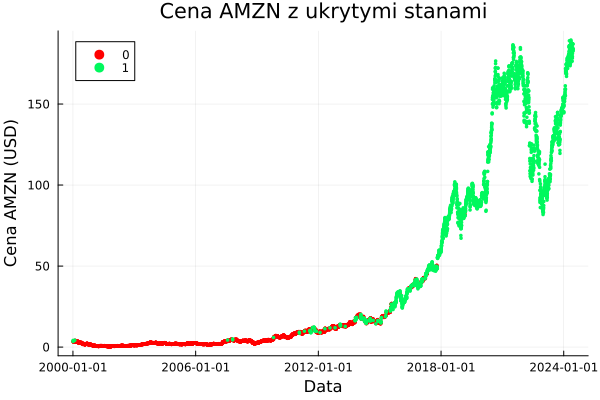

In [107]:
using Plots
using DataFrames
colours = distinguishable_colors(length(states), colorant"red")

p = plot(figsize=(900, 600),  grid=true, xlabel="Data", ylabel="Cena $symbol (USD)",
    title="Cena $symbol z ukrytymi stanami")

# wykres cen
for (i, state) in enumerate(states)
    want = Z .== state
    x = df_merged.Date[want]
    y = df_merged.Close[want]
    plot!(p, x, y, markershape=:circle,markersize=2 ,markerstrokewidth=0,line=nothing, color=colours[i], label=state)  # Plot gold prices for each state/component
end

display(p)

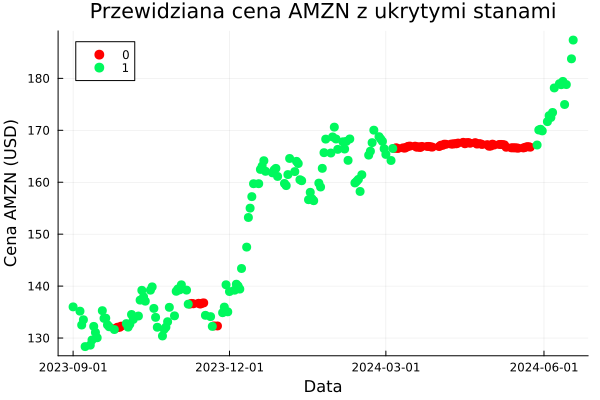

In [108]:
using Plots
using DataFrames

colours = distinguishable_colors(length(states), colorant"red")
p = plot(figsize=(1000, 800),  grid=true, xlabel="Data", ylabel="Cena $symbol (USD)",
    title="Przewidziana cena $symbol z ukrytymi stanami")

for (i, state) in enumerate(states)
    want = df_merged.State .== state
    xx = df_merged.Date[want]
    y = df_merged.Predicted_Close[want]
    plot!(p, xx, y, markershape=:circle,markersize=5 ,markerstrokewidth=0,line=nothing, color=colours[i], label=state)  # Plot gold prices for each state/component
end

display(p)

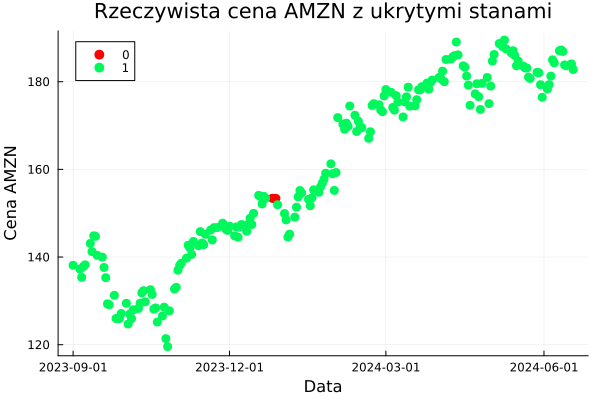

In [109]:
using Plots
using DataFrames

df_last=df_merged[end-num_s+1:end,:]
colours = distinguishable_colors(length(states), colorant"red")

p = plot(figsize=(900, 600),  grid=true, xlabel="Data", ylabel="Cena $symbol",
    title="Rzeczywista cena $symbol z ukrytymi stanami")

for (i, state) in enumerate(states)
    want = Z[end-num_s+1:end] .== state
    xx = df_last.Date[want]
    y = df_last.Close[want]
    plot!(p, xx, y, markershape=:circle,markersize=5 ,markerstrokewidth=0,line=nothing, color=colours[i], label=state)  # Plot gold prices for each state/component
end

display(p)

In [110]:
model_score,aic,bic

(15054.049770130065, -30096.09954026013, -30055.751369979687)

In [111]:
current_state_probabilities

2-element Vector{Float64}:
 1.1107492287321016e-19
 1.0

In [112]:
transmat

2×2 Matrix{Float64}:
 0.983726   0.0162739
 0.0298752  0.970125

In [113]:
using LinearAlgebra
x_days =floor(num_sample/2)

next_x_days_state_probabilities = transmat^x_days * current_state_probabilities
next_x_days_state_probabilities /= sum(next_x_days_state_probabilities)

println("Prawdopodobieństwo każdego stanu po $x_days dniach:")
println(next_x_days_state_probabilities)

Prawdopodobieństwo każdego stanu po 100.0 dniach:
[0.49373308172960984, 0.5062669182703902]


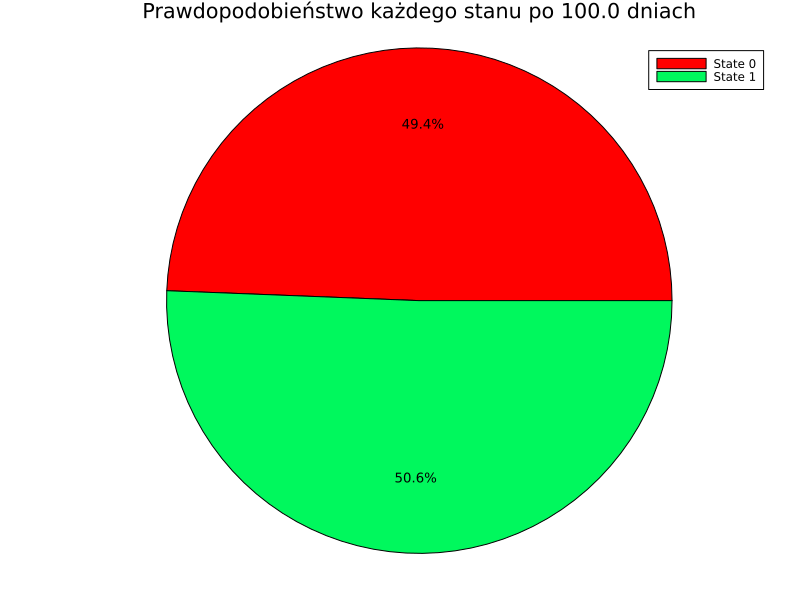

In [74]:
using Plots
using Printf

datapct = [@sprintf("%.1f%%", x_days/sum(next_x_days_state_probabilities)*100) for x_days in next_x_days_state_probabilities]

labels = [string("State ", i) for i in 0:length(states)-1]
colors = distinguishable_colors(length(states), colorant"red")
plt = plot(legend=true, title="Prawdopodobieństwo każdego stanu po $x_days dniach", size=(800, 600))
pie!(plt,labels, next_x_days_state_probabilities,  color=colors, explode=[0,0.3,0,0])


for (i, (prob, label)) in enumerate(zip(next_x_days_state_probabilities, datapct))

    angle = sum(next_x_days_state_probabilities[1:i-1]) * 360 + prob * 180 
    xx = cosd(angle) * 0.7  
    y = sind(angle) * 0.7  
    annotate!(xx,y,Plots.text(label, 9, :black))
end


display(plt)


[ Info: Saved animation to C:\Users\Sylwia\Magisterka\probabilities_over_time.gif


Plots.AnimatedGif("C:\\Users\\Sylwia\\Magisterka\\probabilities_over_time.gif")
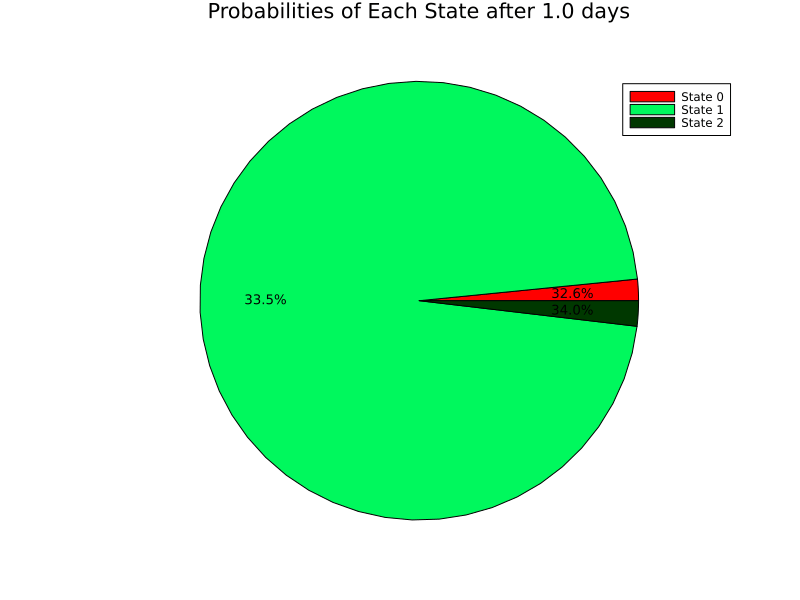

In [26]:
using Plots
using Printf
using Plots.PlotMeasures


x_values = 1:x_days  # Replace with your actual x values

anim = Animation()

for x in x_values
    datapct = [@sprintf("%.1f%%", x/sum(next_x_days_state_probabilities)*100) for x in next_x_days_state_probabilities]

    labels = [string("State ", i) for i in 0:length(states)-1]
    colors = distinguishable_colors(length(states), colorant"red")
    next_x_days_state_probabilities = transmat^x * current_state_probabilities
    next_x_days_state_probabilities /= sum(next_x_days_state_probabilities)
    plt = plot(legend=true, title="Prawdopodobieństwo każdego stanu po $x dniach", size=(800, 600), margin=10mm)
    pie!(plt,labels, next_x_days_state_probabilities,  color=colors, explode=[0,0.3,0,0])

    for (i, (prob, label)) in enumerate(zip(next_x_days_state_probabilities, datapct))
        angle = sum(next_x_days_state_probabilities[1:i-1]) * 360 + prob * 180 
        xx = cosd(angle) * 0.7
        y = sind(angle) * 0.7 
        annotate!(plt, xx, y, Plots.text(label, 9, :black))
    end

    frame(anim, plt)
end

gif(anim, "probabilities_over_time_vit2.gif", fps=2)

In [114]:
using Statistics  # Importowanie modułu do obliczeń statystycznych
squared_list = [x^2 for x in (df_merged.Close-df_merged.Predicted_Close) if !isnan(x)]
#błąd średniokwadratowy
MSE=mean(squared_list)

110.60289455005997

In [50]:
transmat

3×3 Matrix{Float64}:
 0.967136     0.0328639  2.85895e-9
 0.0564185    0.93168    0.0119011
 7.83439e-20  0.087513   0.912487

In [70]:
y_pred=df_last.Predicted_Close
y_true=df_last.Close

20-element Vector{Float64}:
 1.316834
 1.323936
 1.289743
 1.335308
 1.343603
 1.453733
 1.449453
 1.632476
 1.576647
 1.734911
 1.624954
 1.601919
 1.506044
 1.686682
 1.513548
 1.45973
 1.545196
 1.500202
 1.329461
 1.31384